In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df = pd.read_csv('Heart Disease data.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Dataset Details
'''
cp - Chest Pain Type( 4 Types of Values) 
trestbps - Resting Blood Pressure
chol - Cholestrol in mg/dl
fbs - fasting Blood Sugar > 120 mg/dl
rest ecg - Resting ECG Value(0,1,2)
thalach - Maximum Heart Rate achieved
exang - Exercise Induced Angina
oldpeak - ST depression induced by  exercise relative to %reset
slope - Slope of Peak Exercise ST segment
ca - Number Of major vessels(0-3) colored by fluorosopy
thal - 0 = normal; 1 = fixed defect; 2 = reversible defect
'''

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.rename(columns = {'age':'AGE','sex':'Gender','cp':'Chest Pain','trestbps':'Resting BP','chol':'Cholestrol'
                    ,'fbs':'Fasting Sugar','restecg':'Resting ECG','thalach':'Max Heart Rate'},inplace=True)

In [6]:
df.isnull().sum()

AGE               0
Gender            0
Chest Pain        0
Resting BP        0
Cholestrol        0
Fasting Sugar     0
Resting ECG       0
Max Heart Rate    0
exang             0
oldpeak           0
slope             0
ca                0
thal              0
target            0
dtype: int64

In [7]:
max(df['AGE'])

77

In [8]:
min(df['AGE'])

29

In [9]:
df.head(8)

,AGE,Gender,Chest Pain,Resting BP,Cholestrol,Fasting Sugar,Resting ECG,Max Heart Rate,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0


In [10]:
# df= df.to_csv('New Heart.csv')

In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns


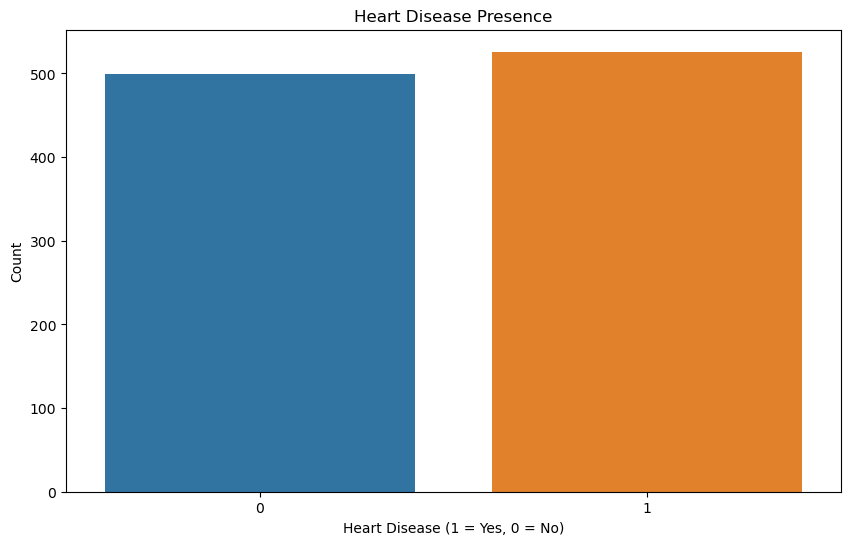

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=df)
plt.title('Heart Disease Presence')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

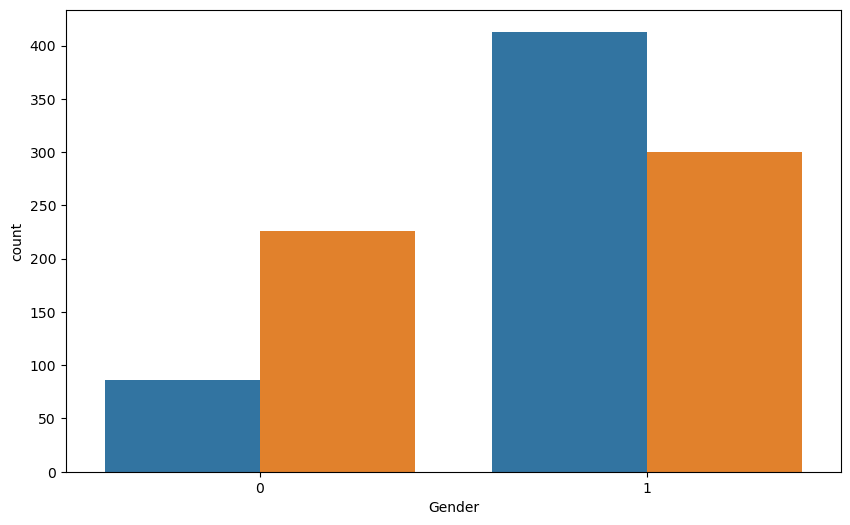

In [13]:
# Count plot of heart disease presence by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='target', data=df)
plt.title('Heart Disease Presence by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


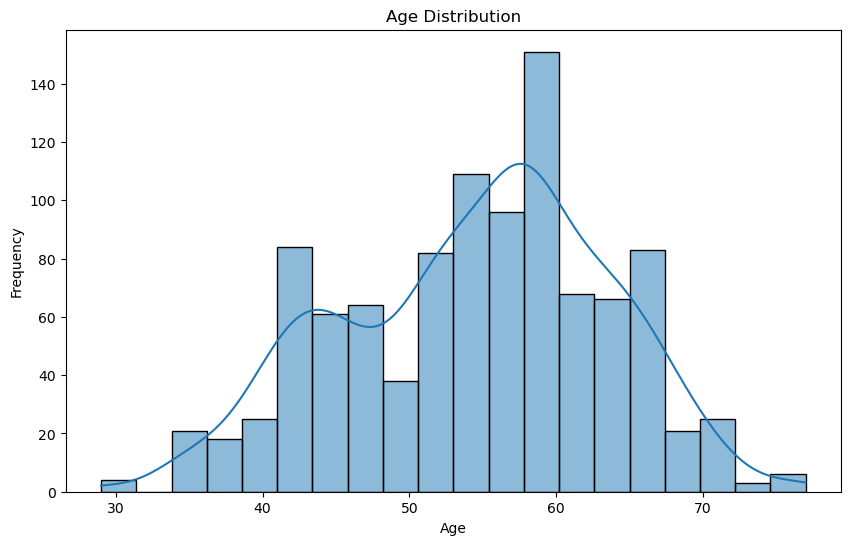

In [14]:
# Distribution plot of age
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], kde=True, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


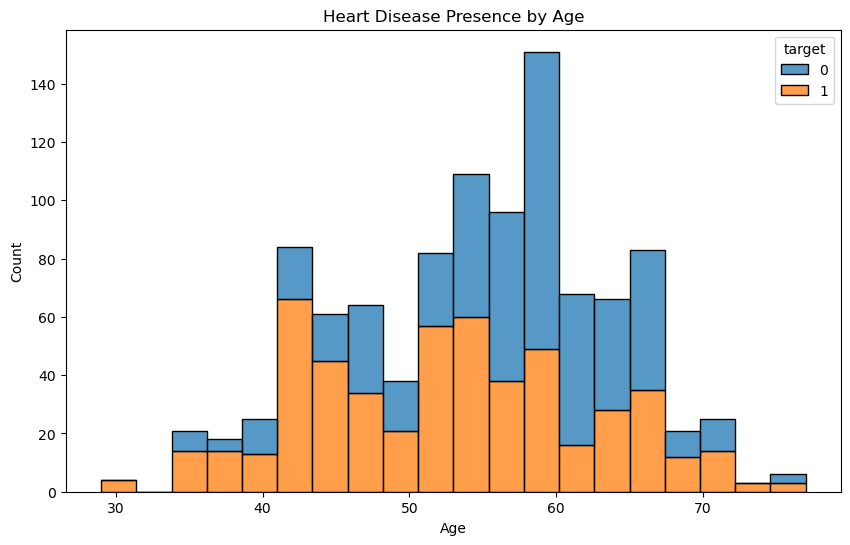

In [15]:
# Heart disease presence by age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='AGE', hue='target', multiple='stack', bins=20)
plt.title('Heart Disease Presence by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

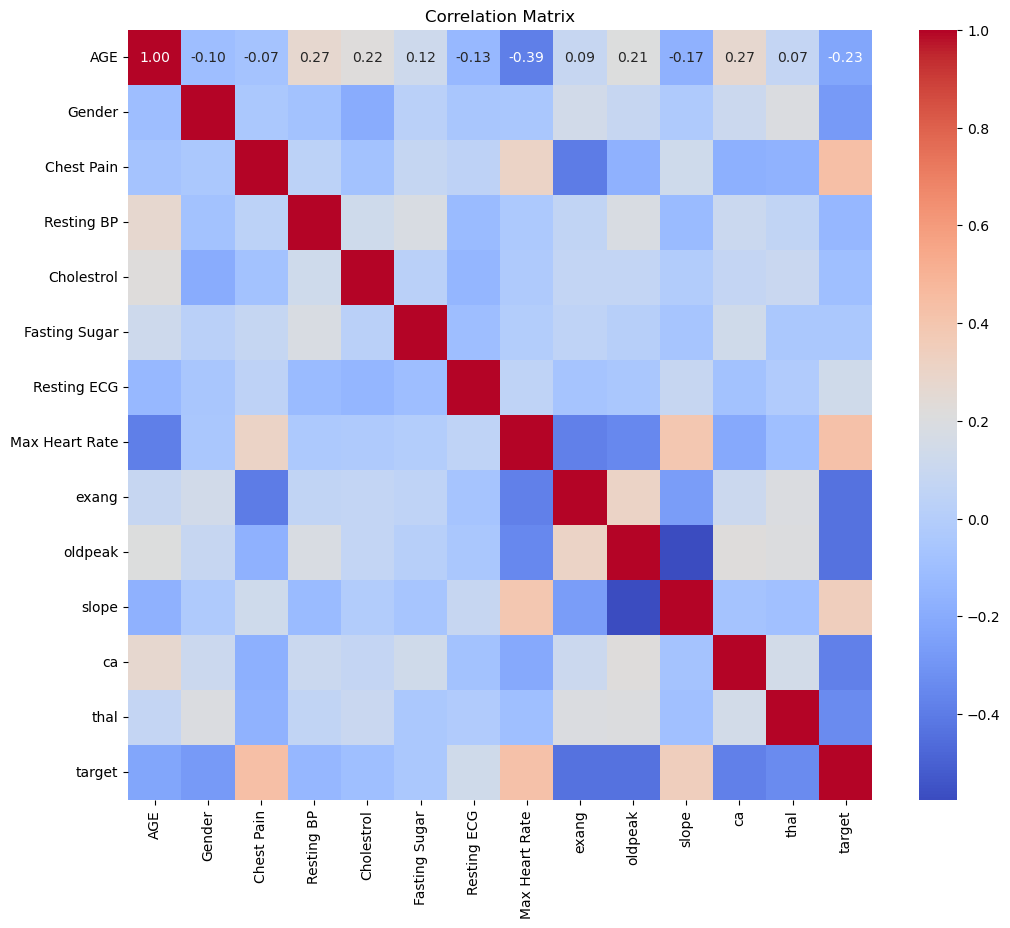

In [16]:
# Correlation matrix
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [17]:
# Key metrics
total_patients = len(df)
patients_with_disease = df['target'].sum()
patients_without_disease = total_patients - patients_with_disease
percentage_with_disease = (patients_with_disease / total_patients) * 100

print(f"Total Patients: {total_patients}")
print(f"Patients with Heart Disease: {patients_with_disease} ({percentage_with_disease:.2f}%)")
print(f"Patients without Heart Disease: {patients_without_disease} ({100 - percentage_with_disease:.2f}%)")


Total Patients: 1025
Patients with Heart Disease: 526 (51.32%)
Patients without Heart Disease: 499 (48.68%)


In [22]:
num=df.groupby('target').size()
num

target
0    499
1    526
dtype: int64

In [23]:
def heart_disease(row):
    if row==0:
        return 'Absence'
    elif row==1:
        return 'Presence'

In [25]:
df['Heart_Disease']=df['target'].apply(heart_disease)
df.head()

,AGE,Gender,Chest Pain,Resting BP,Cholestrol,Fasting Sugar,Resting ECG,Max Heart Rate,exang,oldpeak,slope,ca,thal,target,Heart_Disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absence
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absence
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absence
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absence
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absence


In [27]:
h=df.groupby('Heart_Disease')['target'].count()
h

Heart_Disease
Absence     499
Presence    526
Name: target, dtype: int64

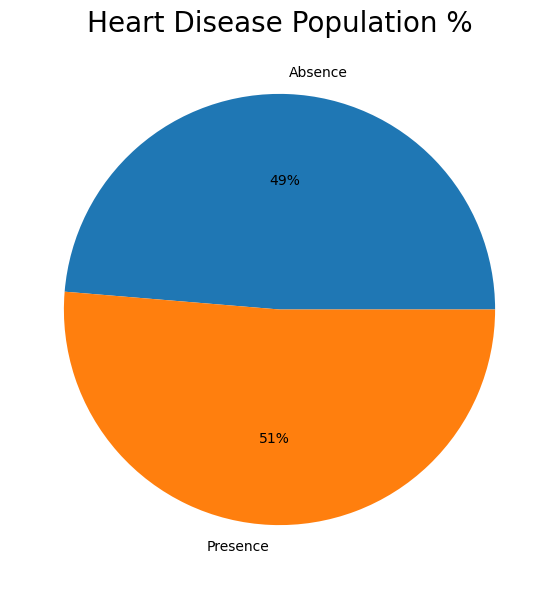

In [29]:
plt.figure(figsize=(10,7))
plt.pie(h, labels=['Absence','Presence'], autopct='%0.0f%%')
plt.title('Heart Disease Population %', fontsize=20)
plt.show()

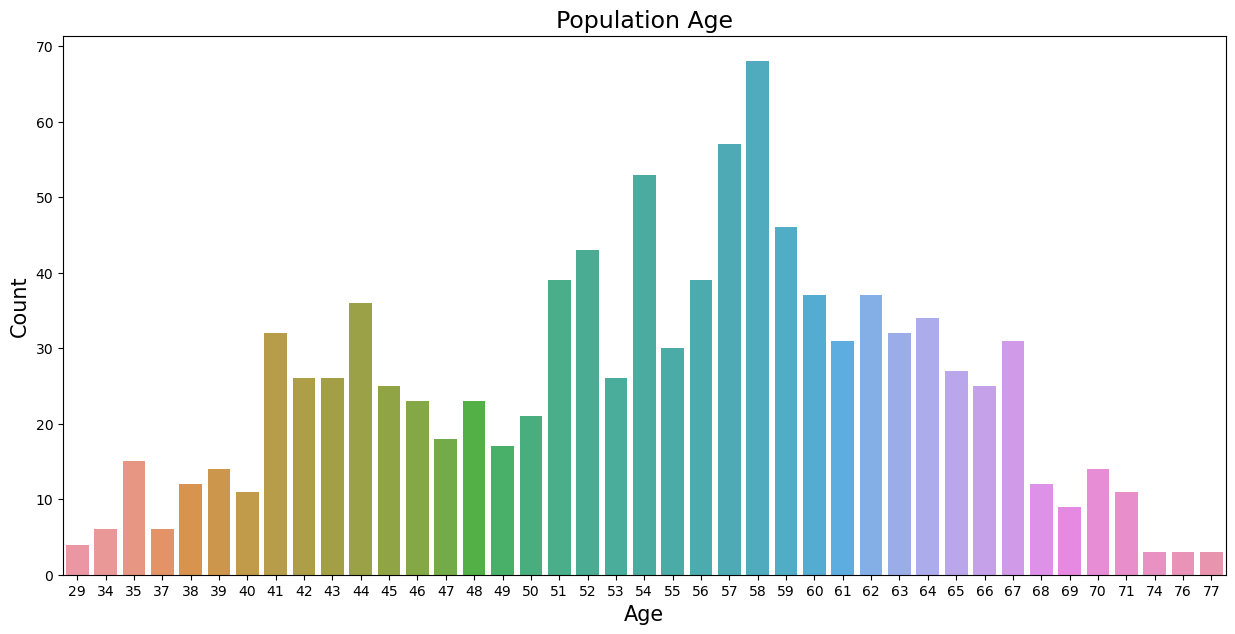

In [30]:

plt.figure(figsize=(15,7))
sns.countplot(x='AGE', data=df)
plt.title('Population Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In [31]:
min(df['AGE'])

29

In [32]:
max(df['AGE'])

77

In [34]:
Young=df[(df['AGE']>=29) & (df['AGE']<40)]
Middle=df[(df['AGE']>=40) & (df['AGE']<55)]
Elderly=df[(df['AGE']>55)]
print('Young Ages =',len(Young))
print('Middle Ages =',len(Middle))
print('Elderly Ages =',len(Elderly))

Young Ages = 57
Middle Ages = 419
Elderly Ages = 519


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


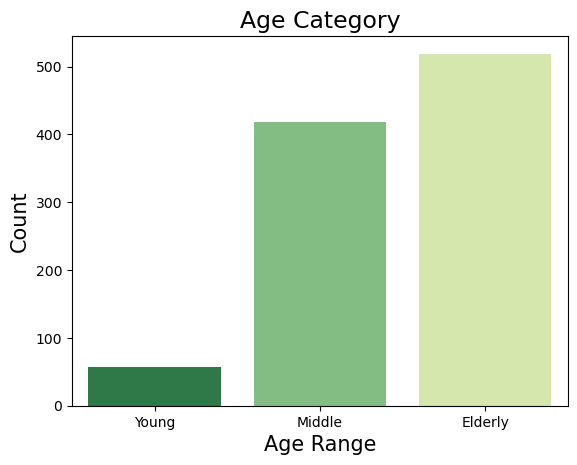

In [35]:
sns.barplot(x=['Young','Middle','Elderly'], y=[len(Young), len(Middle), len(Elderly)], palette='YlGn_r')
plt.title('Age Category', fontsize=17)
plt.xlabel('Age Range', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

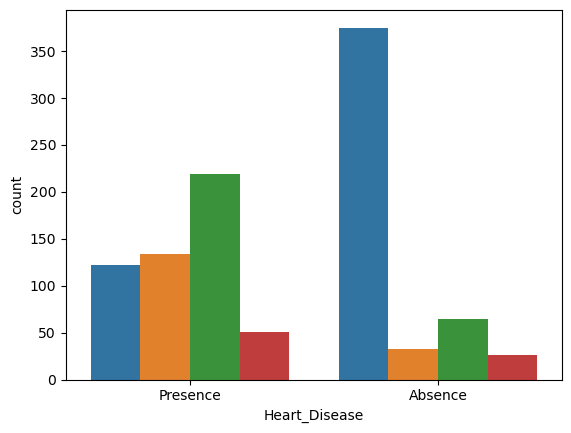

In [48]:
sns.countplot(x=df['Heart_Disease'], hue='Chest Pain', data=df, order=['Presence','Absence'])
plt.title('Chest Pain Experienced', fontsize=17)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()